In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [43]:
plt.style.use('fivethirtyeight')

In [348]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# Get the data 

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [11]:
matches.shape

(636, 18)

In [13]:
deliveries.shape

(150460, 21)

In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [16]:
matches.drop('umpire3', axis=1, inplace=True)

In [19]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [32]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [33]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [37]:
teams_full_name=matches['team1'].unique()

In [ ]:
teams_short_name = 'SRH MI GL RPS RCB KKR DD KXIP CSK RR DC KTK PW RPS'.split()

In [40]:
#replacing the teams full name with teams short name

matches.replace(to_replace=teams_full_name, value=teams_short_name,inplace=True)
deliveries.replace(to_replace=teams_full_name, value=teams_short_name,inplace=True)

In [49]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [71]:
#  	player_dismissed 	dismissal_kind 	fielder filling this colom with 'No wicket'

def fillNoWicket(col):
    if col is np.nan:
        return 'No wicket'
    else:
        return col

In [72]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].apply(fillNoWicket)

In [73]:
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].apply(fillNoWicket)

In [74]:
deliveries['fielder'] = deliveries['fielder'].apply(fillNoWicket)

In [75]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

## Basic Analysis

In [218]:
print('Total Matchs Played =', len(matches['id']))
print('No.of teams played =',matches['team1'].nunique())
print('Name of teams played =',matches['team1'].unique())

Total Matchs Played = 636
No.of teams played = 13
Name of teams played = ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [224]:
# the team wins the match with highes run difference

matches[matches['win_by_runs'] == matches['win_by_runs'].max()][['Teams', 'toss_winner',
                                                               'toss_decision', 'winner', 
                                                               'win_by_runs']]

,Teams,toss_winner,toss_decision,winner,win_by_runs
43,"(MI, DD)",DD,field,MI,146


In [227]:
# the team wins the match with highes wickets difference

matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()][['Teams', 'toss_winner',
                                                               'toss_decision', 'winner', 
                                                               'win_by_wickets']]

,Teams,toss_winner,toss_decision,winner,win_by_wickets
2,"(KKR, GL)",KKR,field,KKR,10
34,"(KXIP, DD)",KXIP,field,KXIP,10
71,"(MI, DC)",DC,field,DC,10
119,"(KXIP, DD)",DD,field,DD,10
183,"(RR, RCB)",RCB,field,RCB,10
298,"(RR, MI)",MI,bat,RR,10
376,"(RR, MI)",RR,bat,MI,10
390,"(KXIP, CSK)",CSK,field,CSK,10
542,"(RCB, DD)",RCB,field,RCB,10
590,"(SRH, GL)",SRH,field,SRH,10


In [232]:
#Top 5 player of the match holders
print(matches['player_of_match'].value_counts().head())

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: player_of_match, dtype: int64


In [242]:
#Venue
print('No.of venues =',matches['venue'].nunique())
print('\n Match played Venues:\n\n',matches['venue'].unique())

No.of venues = 35

 Match played Venues:

 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stad

In [256]:
# umpire
print('No.of First Umpires =',
matches['umpire1'].nunique(), '\nNo.of Second Umpires =',
      
matches['umpire2'].nunique()
)



No.of First Umpires = 44 
No.of Second Umpires = 45


In [253]:
print('First Umpires:\n\n',
matches['umpire1'].unique(), '\n\nSecond Umpires:\n\n',
      
matches['umpire2'].unique()
)


First Umpires:

 ['AY Dandekar' 'A Nand Kishore' 'Nitin Menon' 'AK Chaudhary' nan
 'A Deshmukh' 'KN Ananthapadmanabhan' 'YC Barde' 'S Ravi' 'CB Gaffaney'
 'M Erasmus' 'NJ Llong' 'CK Nandan' 'Asad Rauf' 'MR Benson' 'Aleem Dar'
 'SJ Davis' 'BF Bowden' 'IL Howell' 'DJ Harper' 'RE Koertzen'
 'BR Doctrove' 'AV Jayaprakash' 'BG Jerling' 'HDPK Dharmasena' 'S Asnani'
 'GAV Baxter' 'SS Hazare' 'K Hariharan' 'SL Shastri' 'SK Tarapore'
 'SJA Taufel' 'S Das' 'AM Saheba' 'PR Reiffel' 'JD Cloete' 'VA Kulkarni'
 'BNJ Oxenford' 'C Shamshuddin' 'RK Illingworth' 'RM Deshpande'
 'K Srinath' 'SD Fry' 'PG Pathak' 'K Bharatan'] 

Second Umpires:

 ['NJ Llong' 'S Ravi' 'CK Nandan' 'C Shamshuddin' nan 'AK Chaudhary'
 'Nitin Menon' 'A Deshmukh' 'VK Sharma' 'M Erasmus' 'CB Gaffaney'
 'A Nand Kishore' 'RE Koertzen' 'SL Shastri' 'GA Pratapkumar' 'DJ Harper'
 'K Hariharan' 'RB Tiffin' 'AM Saheba' 'MR Benson' 'IL Howell'
 'AV Jayaprakash' 'I Shivram' 'BR Doctrove' 'BG Jerling' 'SJ Davis'
 'SD Ranade' 'SJA Taufel' '

In [259]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [293]:
# Super Over 
print('No.of super overs =',
deliveries[deliveries['is_super_over'] == 1]['is_super_over'].value_counts())

No.of super overs = 1    81
Name: is_super_over, dtype: int64


In [296]:
# Wickets
print('Top 5 Wicket Takers\n\n',
deliveries[deliveries['player_dismissed'] != 'No wicket']['bowler'].value_counts().head())

Top 5 Wicket Takers

 SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
Name: bowler, dtype: int64


In [ ]:
# Combine the teams for find the favt team
def combineTeam(teams):
    if teams[0] > teams[1]:
        return teams[0], teams[1]
    else:
        return teams[1], teams[0]

In [ ]:
matches['Teams'] = matches[['team1', 'team2']].apply(combineTeam, axis=1)

In [306]:
# Finding the favrt team
def mostWinsAgainstTeam(team):
    print(team, 'has the most win against\n',
        matches[matches['winner'] ==team][['Teams']].value_counts().head(1))

In [307]:
mostWinsAgainstTeam('MI')

MI has the most win against
 Teams    
(MI, KKR)    16
dtype: int64


## Visual Analysis

In [308]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'Teams'],
      dtype='object')

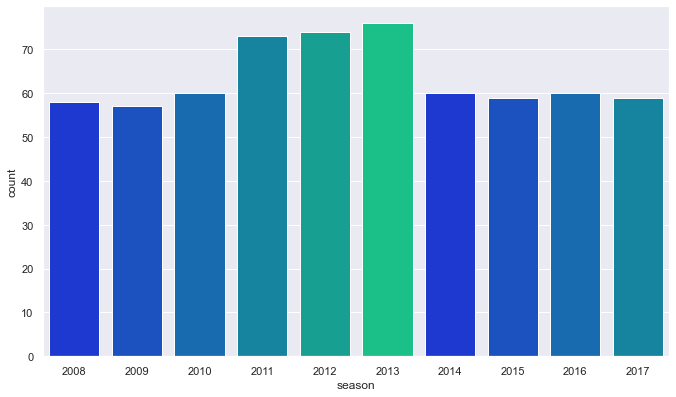

In [366]:
#match played with season
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()


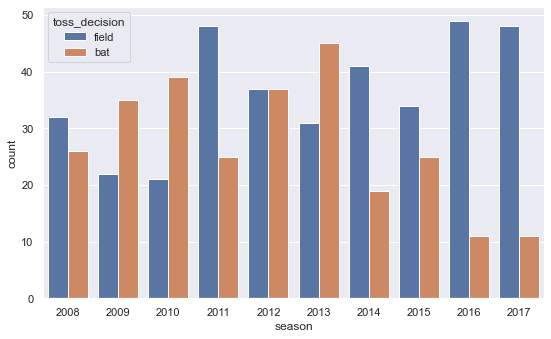

In [311]:
plt.figure(figsize=(8,5))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.show()

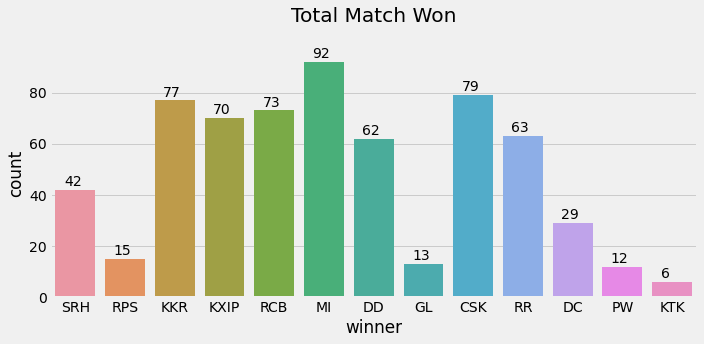

In [95]:
plt.figure(figsize=(10,5))
winner_count=sns.countplot(x='winner', data=matches)
plt.title('Total Match Won\n')
for each in winner_count.patches:
    winner_count.annotate(format(each.get_height()), (each.get_x()+0.17, each.get_height()+1.5))
plt.tight_layout()

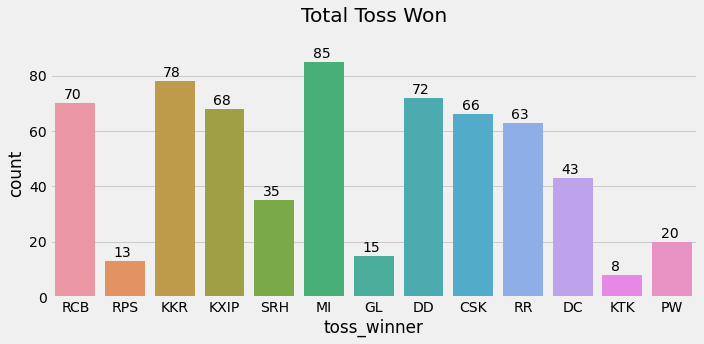

In [93]:
plt.figure(figsize=(10,5))
toss_winner_count=sns.countplot(x='toss_winner', data=matches)
plt.title('Total Toss Won\n')
for each in toss_winner_count.patches:
    toss_winner_count.annotate(format(each.get_height()), 
                               (each.get_x()+0.17, each.get_height()+1.5))
plt.tight_layout()

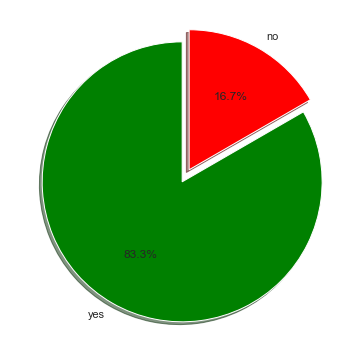

In [367]:
# Is Toss Winner Also the Match Winner?

df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['Green','Red'],explode=(0,0.1),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


In [363]:
# Winners by year

print('Winners By Years')
for i in range(2008,2018):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']


In [350]:
#Total Matches vs wins 

match_played = pd.concat([matches['team1'], matches['team2']])
match_played=match_played.value_counts().reset_index()
match_played.columns=['Team', 'Total matches']
match_played['Wins'] = matches['winner'].value_counts().reset_index()['winner']
match_played

,Team,Total matches,Wins
0,MI,157,92
1,RCB,152,79
2,KXIP,148,77
3,KKR,148,73
4,DD,147,70
5,CSK,131,63
6,RR,118,62
7,SRH,76,42
8,DC,75,29
9,PW,46,15


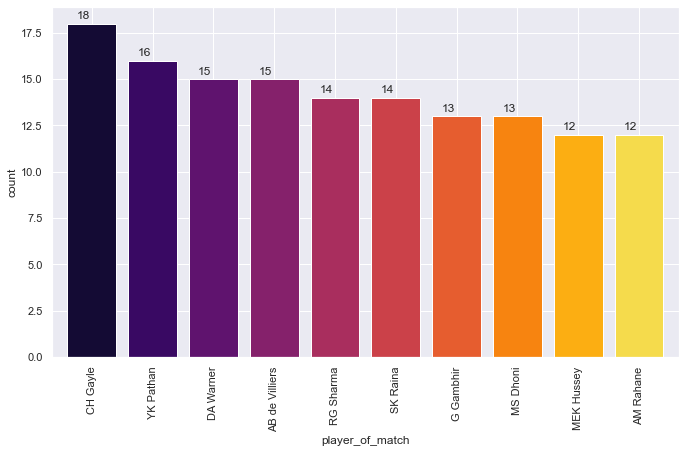

In [365]:
#Most Man Of the Match 
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()



In [369]:
#200 plus score 
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


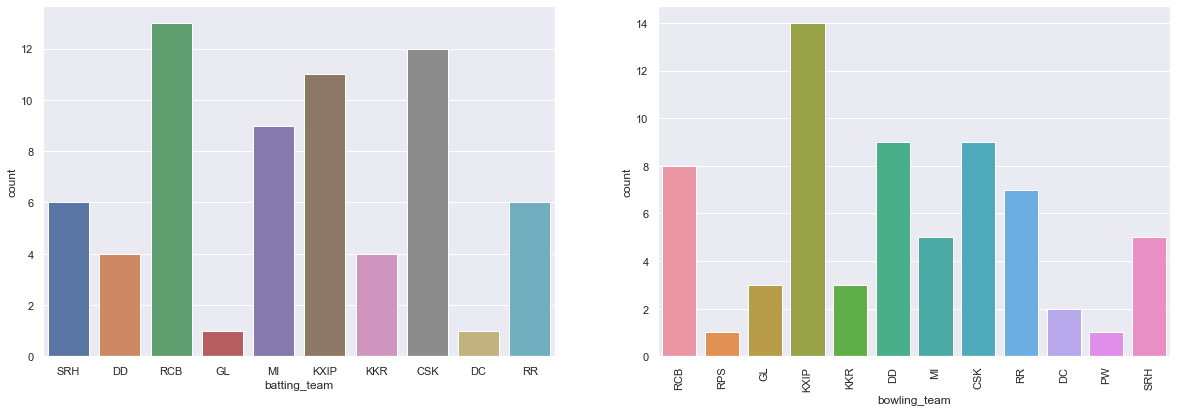

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.


In [374]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='batting_team', data=high_scores,ax=ax[0])
sns.countplot(x='bowling_team', data=high_scores,ax=ax[1])
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
print("The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.")


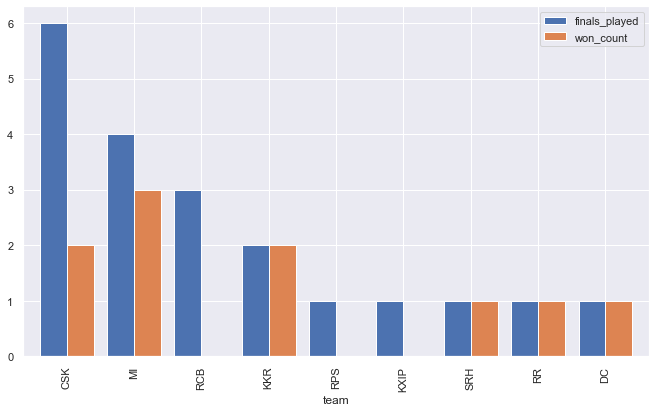

In [356]:
#Finals played vs finals win

finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.show()